In [1]:
# Inspired by Stefanie Molin (added mapping)

import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

In [2]:
meteorites = pd.read_csv('../data/Meteorite_Landings.csv')
meteorites

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,01/01/1880 12:00:00 AM,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,01/01/1951 12:00:00 AM,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,01/01/1952 12:00:00 AM,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,01/01/1976 12:00:00 AM,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,01/01/1902 12:00:00 AM,-33.16667,-64.95000,"(-33.16667, -64.95)"
...,...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,01/01/1990 12:00:00 AM,29.03700,17.01850,"(29.037, 17.0185)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,01/01/1999 12:00:00 AM,13.78333,8.96667,"(13.78333, 8.96667)"
45713,Zlin,30410,Valid,H4,3.3,Found,01/01/1939 12:00:00 AM,49.25000,17.66667,"(49.25, 17.66667)"
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,01/01/2003 12:00:00 AM,49.78917,41.50460,"(49.78917, 41.5046)"


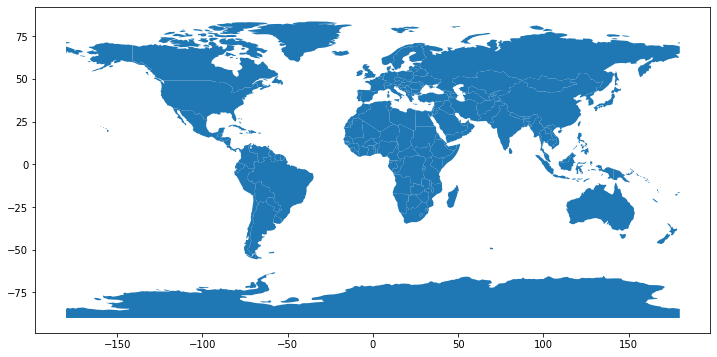

In [3]:
import geopandas

path = geopandas.datasets.get_path('naturalearth_lowres')
df = geopandas.read_file(path)

df.plot(figsize=(14, 6))

In [4]:
from shapely.geometry import Point

geom = [Point(xy) for xy in zip(meteorites.reclong, meteorites.reclat)]
geomdf = geopandas.GeoDataFrame(meteorites, geometry=geom)

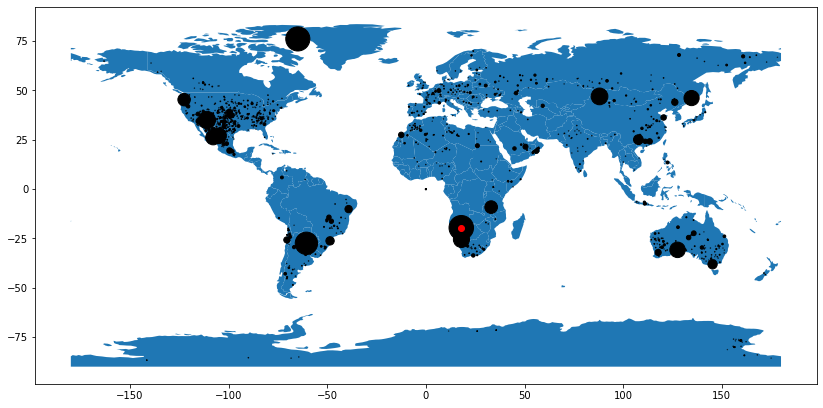

In [5]:
ax = df.plot(figsize=(14, 10))
large_idx = meteorites["mass (g)"] >= 10000
geomdf[large_idx].plot(ax=ax, color='k', markersize=meteorites["mass (g)"][large_idx]/100000)

largest = geomdf.iloc[meteorites["mass (g)"].argmax()]
plt.scatter(largest.reclong, largest.reclat, color='r')

In [6]:
large_idx = meteorites["mass (g)"] >= 10000


In [7]:
large_idx

0        False
1        False
2         True
3        False
4        False
         ...  
45711    False
45712    False
45713    False
45714    False
45715    False
Name: mass (g), Length: 45716, dtype: bool